<a href="https://colab.research.google.com/github/Paolo20224/Prueba/blob/main/hotel_bookings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#Como parte inicial, descargamos la informacion y la cargamos en nuestro cuader en Colab
import pandas as pd
filename = "/content/hotel_bookings.csv"
df = pd.read_csv(filename)

1.Analisis y Depuracion de Datos

In [7]:
# A continuacion revisaremos la categoria de cada dato, asi como tambien su integridad (verificacion de nulos)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8012 entries, 0 to 8011
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           8012 non-null   object 
 1   is_canceled                     8012 non-null   int64  
 2   lead_time                       8012 non-null   int64  
 3   arrival_date_year               8012 non-null   int64  
 4   arrival_date_month              8011 non-null   object 
 5   arrival_date_week_number        8011 non-null   float64
 6   arrival_date_day_of_month       8011 non-null   float64
 7   stays_in_weekend_nights         8011 non-null   float64
 8   stays_in_week_nights            8011 non-null   float64
 9   adults                          8011 non-null   float64
 10  children                        8011 non-null   float64
 11  babies                          8011 non-null   float64
 12  meal                            80

In [8]:
#A continuacion revisaremos el archivo en excel para validar que elementos conducentes a error puede contener esta base.
df.to_excel("hotelbookings.xlsx", index=False)

In [9]:
#A continuacion analizamos la correlacion entra las variables cuantitativas.

import pandas as pd

corr_df = df.corr(method='pearson')

corr_df.style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.002094,0.381281,-0.213014,-0.017367,0.022217,-0.003669,0.043591,0.073064,0.000609,nan,nan,nan,-0.200088,0.036350,-0.283230,-0.126666,0.172789,-0.305660,-0.107116
lead_time,0.002094,1.000000,0.417830,-0.183913,-0.026794,0.231367,0.273506,0.116065,-0.054011,-0.006457,nan,nan,nan,0.070383,-0.049552,0.051167,0.086407,-0.113236,-0.107761,-0.019146
arrival_date_year,0.381281,0.417830,1.000000,-0.723426,0.028477,0.029973,0.031138,-0.029913,0.018905,-0.020030,nan,nan,nan,-0.004042,0.066122,-0.292199,-0.089761,0.040453,-0.197929,-0.177625
arrival_date_week_number,-0.213014,-0.183913,-0.723426,1.000000,0.038162,0.014906,0.020934,0.017943,0.014132,0.033854,nan,nan,nan,0.030311,-0.022594,0.365652,0.171345,0.106995,0.114027,0.115523
arrival_date_day_of_month,-0.017367,-0.026794,0.028477,0.038162,1.000000,-0.103917,-0.043818,-0.019555,-0.013745,-0.015687,nan,nan,nan,0.022098,0.028393,-0.039101,0.131967,-0.003140,0.004342,-0.007578
stays_in_weekend_nights,0.022217,0.231367,0.029973,0.014906,-0.103917,1.000000,0.723851,0.033505,0.038568,0.021387,nan,nan,nan,0.030139,-0.171058,-0.015553,-0.088152,0.057061,-0.050436,0.072618
stays_in_week_nights,-0.003669,0.273506,0.031138,0.020934,-0.043818,0.723851,1.000000,0.018622,0.031943,0.023266,nan,nan,nan,0.078779,-0.155747,0.077954,0.019953,0.066066,-0.053283,0.078079
adults,0.043591,0.116065,-0.029913,0.017943,-0.019555,0.033505,0.018622,1.000000,0.023368,0.002727,nan,nan,nan,-0.032858,-0.054005,0.094217,-0.016165,0.033038,0.001017,0.000423
children,0.073064,-0.054011,0.018905,0.014132,-0.013745,0.038568,0.031943,0.023368,1.000000,0.007789,nan,nan,nan,0.036056,0.054719,0.143032,-0.032538,0.340389,0.030722,-0.005400
babies,0.000609,-0.006457,-0.020030,0.033854,-0.015687,0.021387,0.023266,0.002727,0.007789,1.000000,nan,nan,nan,0.079402,0.002663,0.084307,-0.014120,0.062769,0.022167,0.156459


In [10]:
# En base a ciertas premisas y con el objeto de mantener cierta integridad en la informacion, eliminaremos las siguientes columnas y filas, respectivamente:
#Company --> Igual caso que agent, es una columna que posee mucha informacion en blanco y no permite identicarla correctamente.
#Adicionalmente limpiaremos todos los datos con elementos nulos

df2=df
df2 = df2.drop(columns=['company'])
df2 = df2.dropna(subset=["children"])
df2 = df2.dropna(subset=["country"])
df2 = df2.dropna(subset=["agent"])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6833 entries, 3 to 8010
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           6833 non-null   object 
 1   is_canceled                     6833 non-null   int64  
 2   lead_time                       6833 non-null   int64  
 3   arrival_date_year               6833 non-null   int64  
 4   arrival_date_month              6833 non-null   object 
 5   arrival_date_week_number        6833 non-null   float64
 6   arrival_date_day_of_month       6833 non-null   float64
 7   stays_in_weekend_nights         6833 non-null   float64
 8   stays_in_week_nights            6833 non-null   float64
 9   adults                          6833 non-null   float64
 10  children                        6833 non-null   float64
 11  babies                          6833 non-null   float64
 12  meal                            68

In [11]:
df2.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,6833.000000,6833.000000,6833.000000,6833.000000,6833.000000,6833.000000,6833.000000,6833.000000,6833.000000,6833.000000,6833.0,6833.0,6833.0,6833.000000,6833.000000,6833.000000,6833.000000,6833.000000,6833.000000
mean,0.594761,105.383141,2015.534904,29.394995,15.216450,1.379921,3.605591,1.946290,0.144446,0.016098,0.0,0.0,0.0,0.185277,215.250695,1.152203,101.434911,0.060588,0.583346
std,0.490974,82.088621,0.498817,11.901423,8.913674,1.158016,2.463257,0.746115,0.488215,0.129305,0.0,0.0,0.0,0.554870,78.808582,11.332734,57.572629,0.239815,0.808219
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,40.000000,2015.000000,20.000000,7.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,240.000000,0.000000,58.570000,0.000000,0.000000
50%,1.000000,86.000000,2016.000000,30.000000,15.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,240.000000,0.000000,85.000000,0.000000,0.000000
75%,1.000000,162.000000,2016.000000,37.000000,23.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,242.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,468.000000,2016.000000,53.000000,31.000000,13.000000,33.000000,26.000000,10.000000,2.000000,0.0,0.0,0.0,17.000000,436.000000,122.000000,369.000000,2.000000,4.000000


1.Creacion y Optimizacion de Modelo Predictivo (KNN)

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Preparamos el dataset

In [13]:
# Las variables objeto de prediccion fueron elegidas en funcion de su correlacion con la variable a predecir.
X = df2[['lead_time','arrival_date_year','is_repeated_guest','booking_changes','agent','adr','required_car_parking_spaces','total_of_special_requests']].values
y = df2['is_canceled'].values

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=123)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Creamos el Modelo

In [14]:
#Realizamos iteraciones para "N° de vecinos" y nos quedamos con el mejor equilibrio para el nivel de precision de test y entrenamiento.

n_neighbors = 5

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.86
Accuracy of K-NN classifier on test set: 0.81


Resultados obtenidos

In [15]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 633  174]
 [ 206 1037]]
              precision    recall  f1-score   support

           0       0.75      0.78      0.77       807
           1       0.86      0.83      0.85      1243

    accuracy                           0.81      2050
   macro avg       0.81      0.81      0.81      2050
weighted avg       0.82      0.81      0.82      2050



Arbol de Decision

In [16]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt

[[0.62199313 0.37800687]
 [0.57575758 0.42424242]
 [0.57575758 0.42424242]
 ...
 [1.         0.        ]
 [0.         1.        ]
 [0.         1.        ]]
Esta instancia pertenece a la clase [0 0 0 ... 0 1 1]


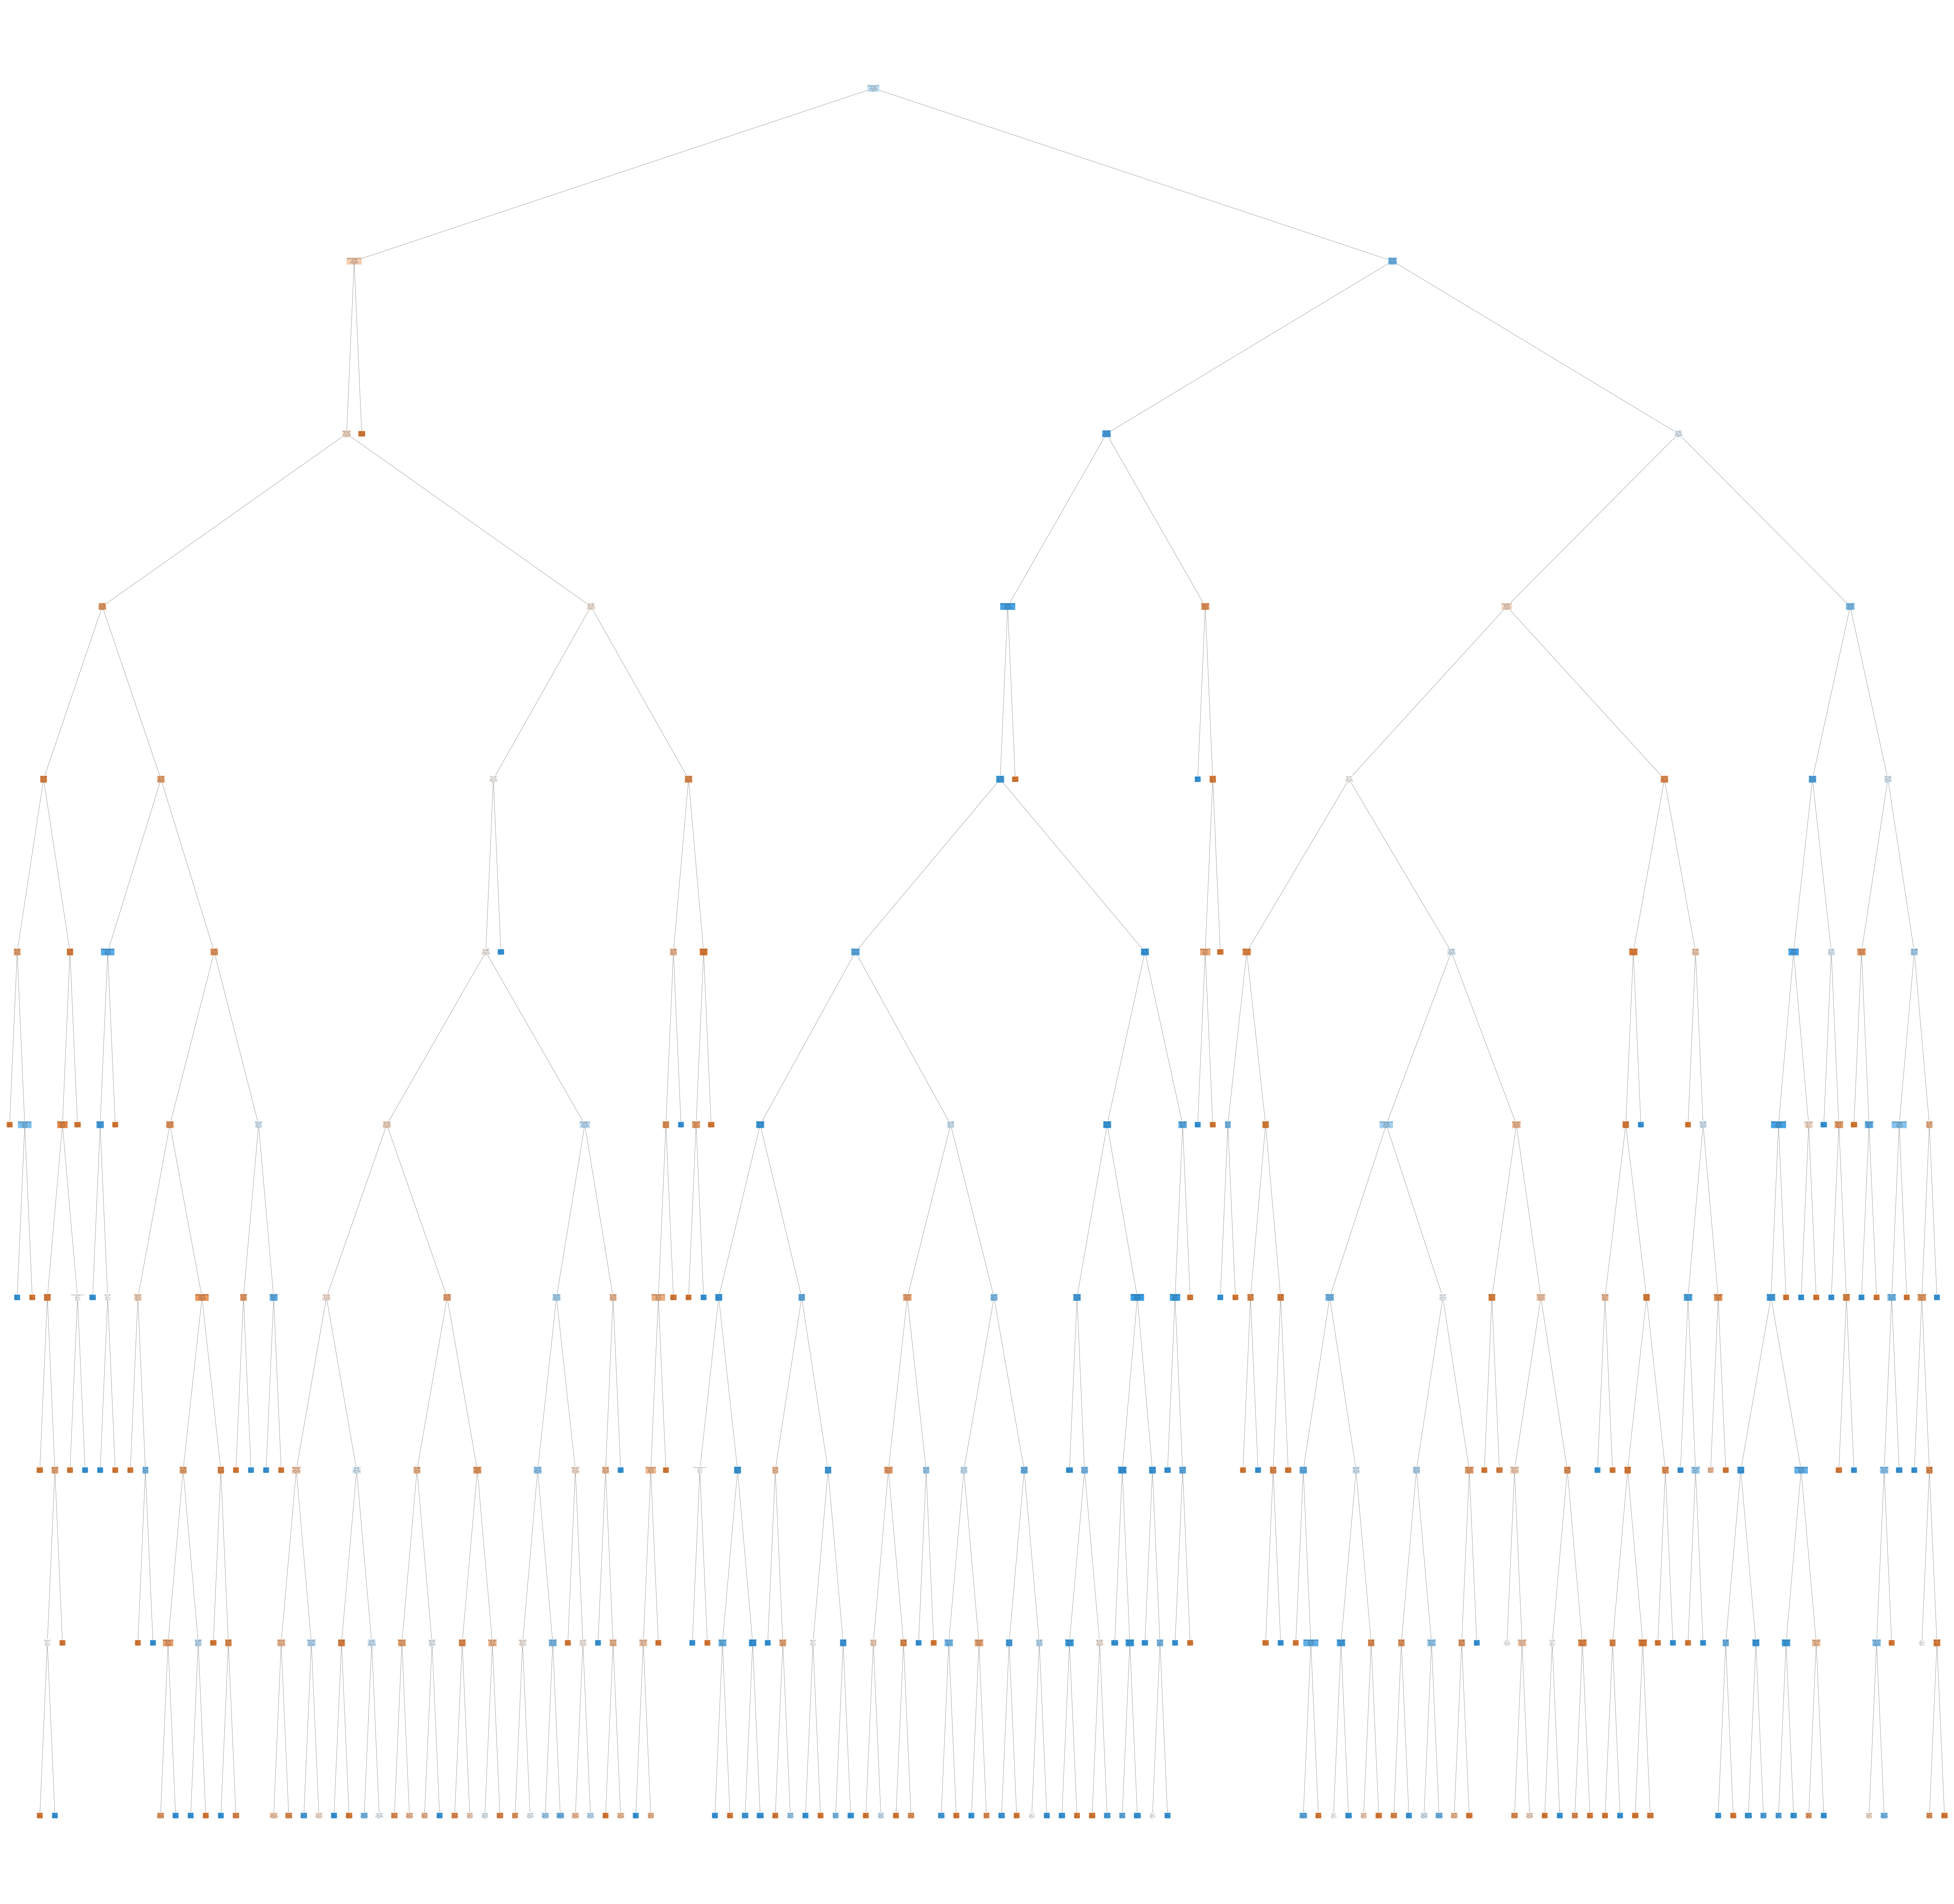

In [17]:
X=df2[['lead_time','arrival_date_year','is_repeated_guest','booking_changes','agent','adr','required_car_parking_spaces','total_of_special_requests']].values
y=df2['is_canceled'].values

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=123)

tree_clf = DecisionTreeClassifier(max_depth=10)
tree_clf.fit(X_train, y_train)
# Visualizando árbol de decisión
plt.figure(figsize=(120,120))
tree.plot_tree(
    tree_clf,
    feature_names=['lead_time','arrival_date_year','is_repeated_guest','booking_changes','agent','adr','required_car_parking_spaces','total_of_special_requests'],
    class_names=['0','1'],
    rounded=True,
    filled=True
)
# Nueva instancia
# CALCULAMOS LAS Probabilidades por cada clase
print(tree_clf.predict_proba(X_test))
# Clase predicha
pred=tree_clf.predict(X_test)
print("Esta instancia pertenece a la clase",tree_clf.predict(X_test))

In [18]:
pred = tree_clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 599  208]
 [ 173 1070]]
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       807
           1       0.84      0.86      0.85      1243

    accuracy                           0.81      2050
   macro avg       0.81      0.80      0.80      2050
weighted avg       0.81      0.81      0.81      2050



Random Forests

In [19]:

from sklearn.ensemble import RandomForestClassifier

rndf_clf = RandomForestClassifier(n_estimators=195)
rndf_clf.fit(X_train, y_train)
y_pred = rndf_clf.predict(X_test)

pred = rndf_clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

rndf_clf.score(X_test, y_test)

[[ 670  137]
 [ 184 1059]]
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       807
           1       0.89      0.85      0.87      1243

    accuracy                           0.84      2050
   macro avg       0.83      0.84      0.84      2050
weighted avg       0.85      0.84      0.84      2050



0.8434146341463414

Regresion Logistica

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# Entrenamiento regresión logística
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [21]:
y_pred = log_reg.predict(X_test)

pred = log_reg.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

log_reg.score(X_test, y_test)

[[ 340  467]
 [ 136 1107]]
              precision    recall  f1-score   support

           0       0.71      0.42      0.53       807
           1       0.70      0.89      0.79      1243

    accuracy                           0.71      2050
   macro avg       0.71      0.66      0.66      2050
weighted avg       0.71      0.71      0.69      2050



0.7058536585365853